In [70]:
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import numpy as np
sns.set_theme()

In [71]:
# Constantes du système

R = 10**3  # Ohms
Rf = 10**3  # Nm/A
C = 100e-6  # F

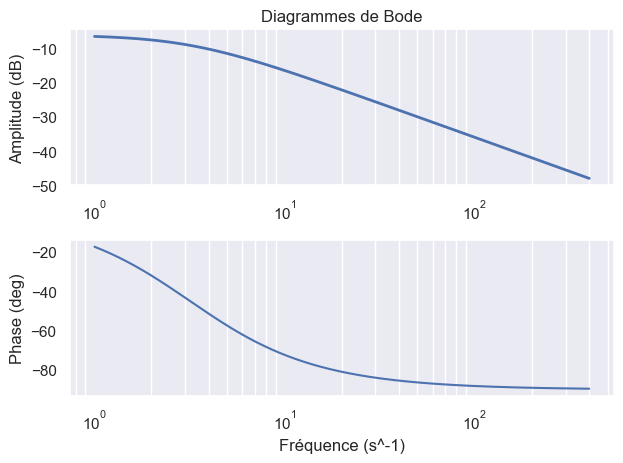

In [72]:
# Modélisation de la fonction de transfert
ft = signal.lti([Rf / (Rf + R)], [R*Rf*C / (Rf + R), 1])

# Calcul du diagramme de Bode
omega = np.logspace(0.8, 3.4, 1000)
w, mag, phase = signal.bode(ft, w=omega)


# Affichage
plt.subplot(211)
plt.title('Diagrammes de Bode')
plt.semilogx(w / (2*pi), mag, lw=2)    # Amplitude
#plt.xlabel('Fréquence (s^-1)')
plt.ylabel('Amplitude (dB)')
plt.grid(which='both')

plt.subplot(212)
plt.semilogx(w / (2*pi), phase)  # Phase
plt.xlabel('Fréquence (s^-1)')
plt.ylabel('Phase (deg)')
plt.grid(which='both')

plt.tight_layout()  # Ajuster le placement des courbes
plt.show()

In [73]:
fc = (R + Rf) / (2 * pi * R * Rf * C)
print(f'Fréquence de coupure : {fc:.2f} Hz')

Fréquence de coupure : 3.18 Hz


In [74]:
Av = 20 * np.log10(Rf / (Rf + R))
print(f'Gain de la composante continue : Rf / (Rf + R) {Av:.2f} dB')

Gain de la composante continue : Rf / (Rf + R) -6.02 dB


In [75]:
logF = np.linspace(1.3, 4, 10**4)
logRf = -0.7 * (logF - 1.7) + 4.

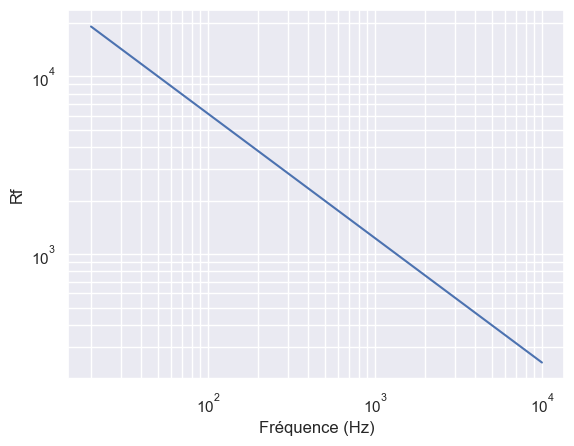

In [76]:
plt.loglog(10**logF, 10**logRf)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Rf')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")

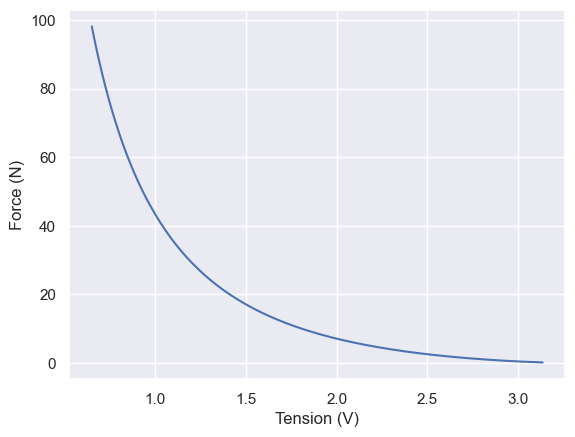

In [109]:
R = 10**3
Vcc = 3.3
Vout = Vcc / (1 + R / (10 ** logRf))
F = 9.81 * 10**logF / 10**3

plt.plot(Vout, F)
plt.ylabel('Force (N)')
plt.xlabel('Tension (V)')
plt.show()

In [108]:
(F[-2] - F[-1]) / (Vout[-2] - Vout[-1])

np.float64(-1815.0804761195293)